![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [112]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
df = pd.read_csv("penguins.csv")
print(df.head())
print(df.shape)

# Make a copy of original dataset

penguins_df = df.copy()
print(penguins_df.shape)

penguins_df2 = df.copy()

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE
(332, 5)
(332, 5)


In [113]:
penguins_df["sex"].value_counts()

MALE      167
FEMALE    165
Name: sex, dtype: int64

In [114]:
print(penguins_df.columns)
print(penguins_df.shape)
print(penguins_df.info())

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')
(332, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None


In [115]:

# change the data of sex column by get_dummies() / one_hot_encoder()
penguins_df = pd.get_dummies(penguins_df, dtype="int")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


In [116]:
# For clustering, it is better to scale/standardize to increase the data performance

scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
print(X)
penguins_pre = pd.DataFrame(data=X, columns=penguins_df.columns)
print(penguins_pre.head())

[[-0.90390586  0.79035987 -1.42534179 -0.56694801 -0.99399394  0.99399394]
 [-0.83043377  0.12618674 -1.0685765  -0.50484747  1.00604235 -1.00604235]
 [-0.68348959  0.43272819 -0.42639899 -1.18795343  1.00604235 -1.00604235]
 ...
 [ 1.17168063 -0.74234736  1.50013355  1.91707363 -0.99399394  0.99399394]
 [ 0.21654349 -1.20215952  0.78660298  1.23396768  1.00604235 -1.00604235]
 [ 1.07984052 -0.53798639  0.85795603  1.48236985 -0.99399394  0.99399394]]
   culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0         -0.903906         0.790360  ...   -0.993994  0.993994
1         -0.830434         0.126187  ...    1.006042 -1.006042
2         -0.683490         0.432728  ...    1.006042 -1.006042
3         -1.344738         1.096901  ...    1.006042 -1.006042
4         -0.867170         1.761074  ...   -0.993994  0.993994

[5 rows x 6 columns]


[1992.0000000000007, 1159.9635506619068, 695.197809547408, 383.46432033536416, 287.7481362875542, 215.9510467634977, 199.5254527295771, 183.48810117222368, 171.25708575664385]


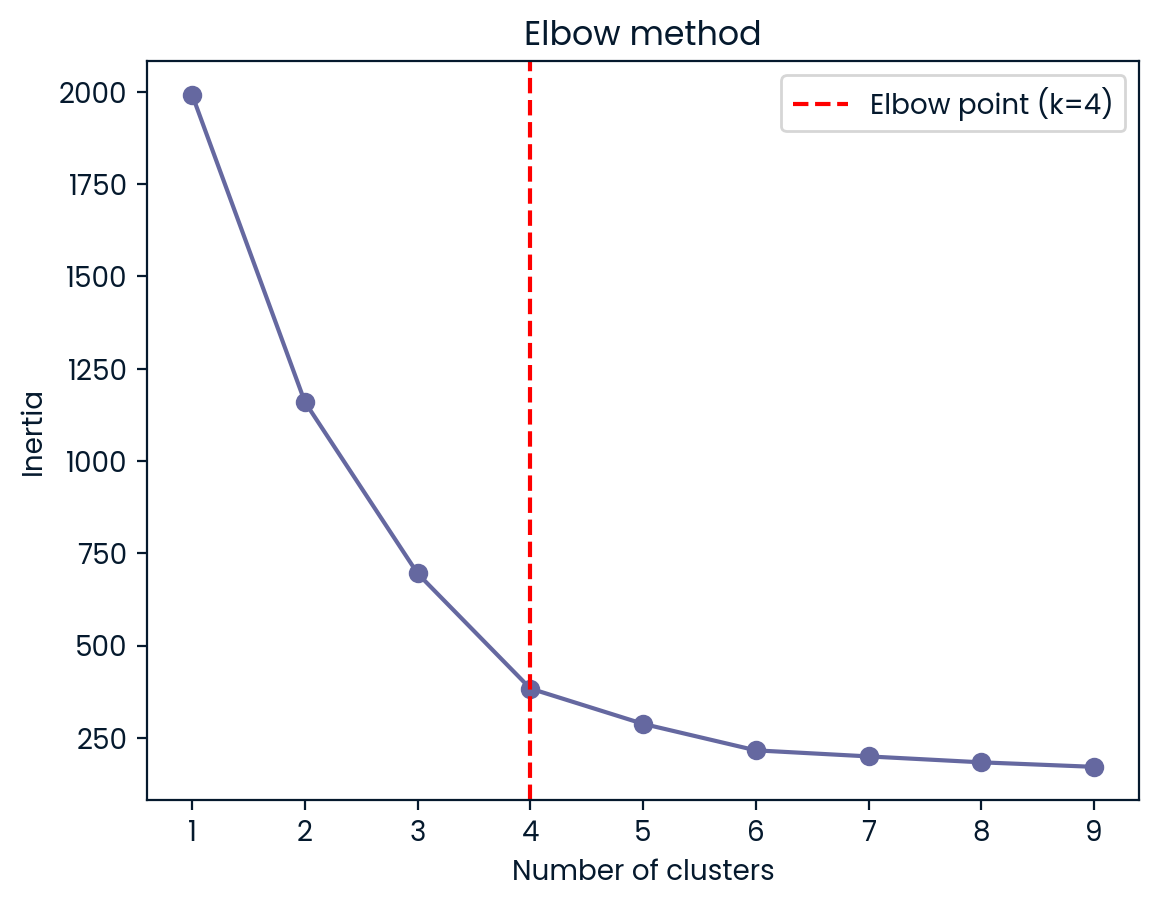

In [117]:
# Detect the optimal number of clusters for k-means clustering

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(penguins_pre)
    inertia.append(kmeans.inertia_)  # based on the list, k=4 is the ebst since inertia stops drop significantly
    
print(inertia)

plt.plot(range(1, 10), inertia, marker="o")
plt.axvline(x=4, color="red", linestyle="--", label="Elbow point (k=4)")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.legend()
plt.show()

In [118]:
# Running the k-means with the optimal n_clusters selected

kmean_optimal = KMeans(n_clusters=4, random_state=1)
kmean_optimal.fit(penguins_pre)
penguins_df["label"] = kmean_optimal.labels_
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,label
0,39.1,18.7,181.0,3750.0,0,1,0
1,39.5,17.4,186.0,3800.0,1,0,1
2,40.3,18.0,195.0,3250.0,1,0,1
3,36.7,19.3,193.0,3450.0,1,0,1
4,39.3,20.6,190.0,3650.0,0,1,0


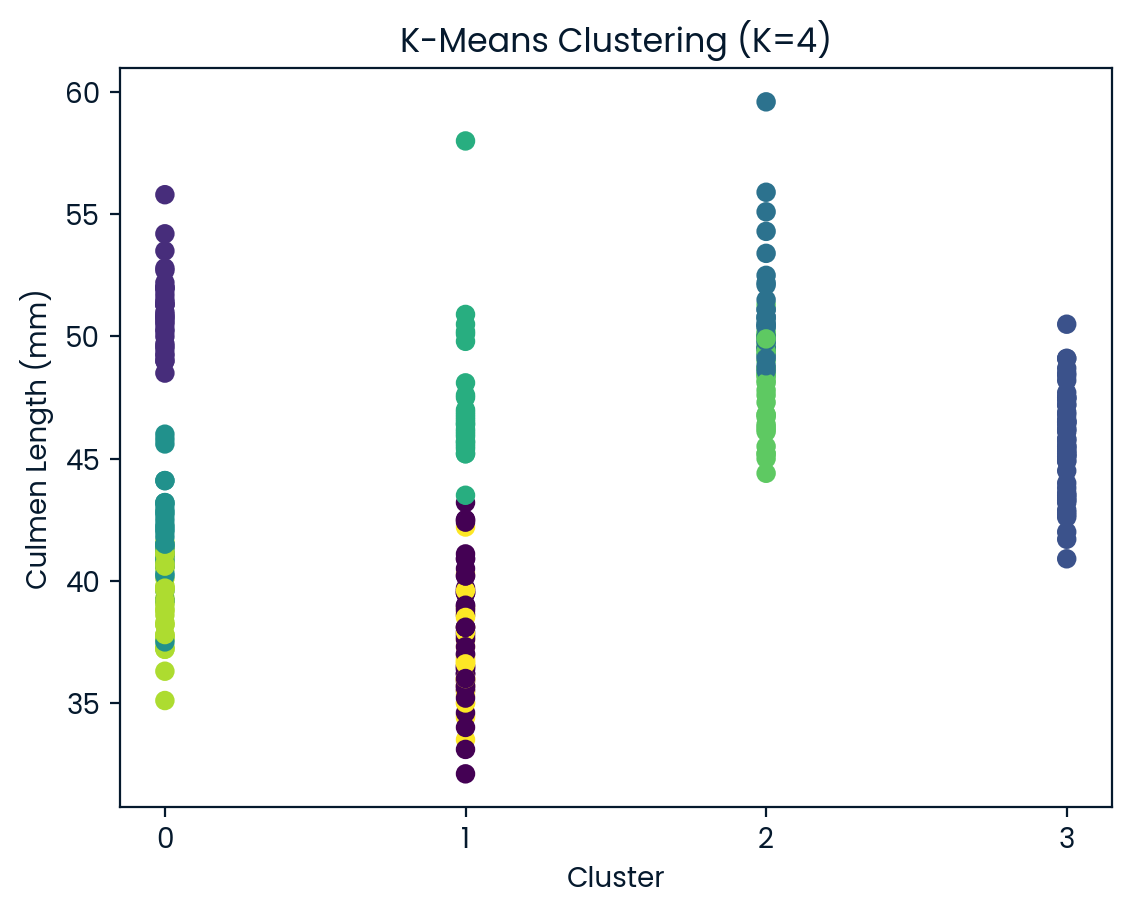

In [119]:
# Visualize the clusters 
plt.scatter(penguins_df["label"], penguins_df["culmen_length_mm"], c=kmeans.labels_, cmap='viridis')
plt.xlabel("Cluster")
plt.ylabel("Culmen Length (mm)")
plt.xticks(range(int(penguins_df["label"].min()), int(penguins_df["label"].max()) + 1))
plt.title("K-Means Clustering (K=4)")
plt.show()

In [120]:
numeric_columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "label"]
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,49.473770,15.718033,221.540984
3,45.563793,14.237931,212.706897


In [121]:
# Checking if K-Means clustering k=2 align with actual male/female labels

X_2 = penguins_df2[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"]]
X_2_scaled = scaler.fit_transform(X_2)

kmeans_2 = KMeans(n_clusters=2, random_state=1, n_init=10)
penguins_df2["cluster"] = kmeans_2.fit_predict(X_2_scaled)
print(penguins_df2[['sex', 'cluster']].head(10))

      sex  cluster
0    MALE        0
1  FEMALE        0
2  FEMALE        0
3  FEMALE        0
4    MALE        0
5  FEMALE        0
6    MALE        0
7  FEMALE        0
8    MALE        0
9  FEMALE        0


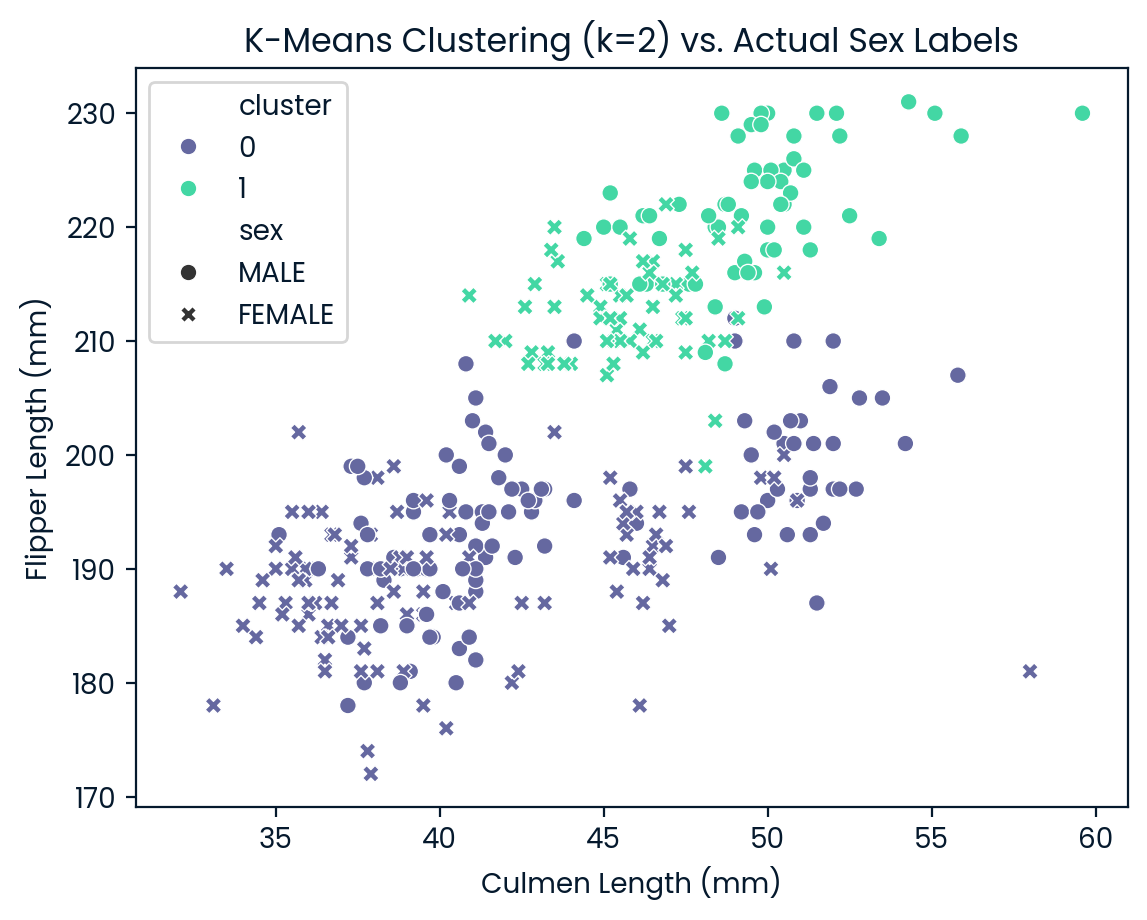

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize clustering results
sns.scatterplot(x=penguins_df2["culmen_length_mm"], y=penguins_df2["flipper_length_mm"], hue=penguins_df2["cluster"], style=penguins_df2["sex"])
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.title("K-Means Clustering (k=2) vs. Actual Sex Labels")
plt.legend()
plt.show()